Feature engineering and selection are critical steps in machine learning workflows, focusing on identifying and transforming the most relevant variables for model training. Principal Component Analysis (PCA) is a widely-used dimensionality reduction technique that simplifies datasets by transforming them into principal components. These components capture the maximum variance in the data while reducing redundancy and noise.

# **Theory:**
## **Importance of Features:**

* Features are the variables or attributes used by machine learning models to make predictions.
* Irrelevant or redundant features can degrade model performance and increase computational cost.
* Feature selection and dimensionality reduction address these challenges by focusing on the most important features.
## **Principal Component Analysis (PCA):**

* PCA transforms the data into a new set of orthogonal features called principal components.
* The first principal component captures the maximum variance in the dataset, with subsequent components capturing decreasing amounts of variance.
* PCA is unsupervised and primarily used to reduce high-dimensional data while retaining as much information as possible.
## **Applications:**
* Visualizing high-dimensional data in 2D or 3D.
* Reducing computational complexity in large datasets.
* Improving the performance of models by eliminating noise.

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

Feature Correlations:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Target                     

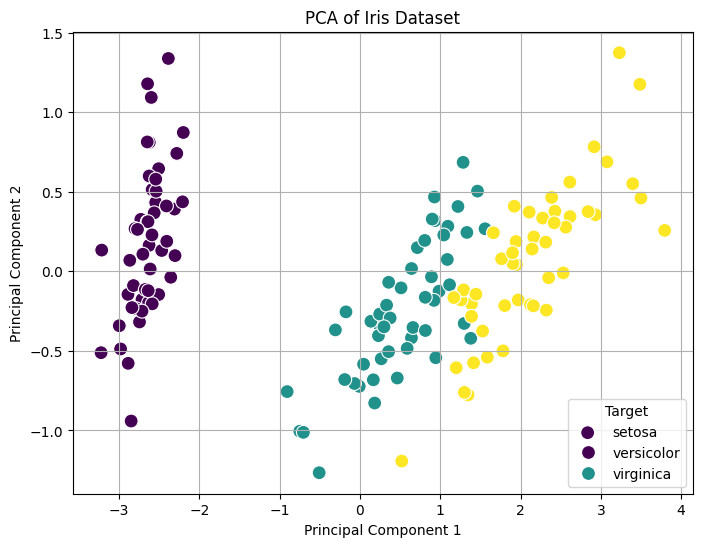


Explained Variance Ratio by Principal Components:
Principal Component 1: 0.92
Principal Component 2: 0.05


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Using the Iris dataset for demonstration
iris = load_iris()
data = iris.data  # Features
target = iris.target  # Target labels
feature_names = iris.feature_names

# Convert the dataset into a DataFrame
df = pd.DataFrame(data, columns=feature_names)
df['Target'] = target

# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())
print("\nFeature Correlations:")
print(df.corr())

# Step 2: Apply PCA
# Initialize PCA to reduce the dataset to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = target

# Step 3: Visualize the results
plt.figure(figsize=(8, 6))

# Plot the principal components
sns.scatterplot(
    data=pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Target',
    palette='viridis',
    s=100
)

# Add plot titles and labels
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', labels=iris.target_names)
plt.grid(True)
plt.show()

# Step 4: Explain Variance Ratio
print("\nExplained Variance Ratio by Principal Components:")
explained_variance = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {variance:.2f}")
